In [1]:
import matplotlib.pyplot as plt      #시각화를 위한 설치
import matplotlib.font_manager as fm    # 한글 폰트
import matplotlib                   #시각화를 위한 설치
import os, warnings  
import pandas as pd                #구조 변경 및 결합을 하기 위한 설치
import seaborn as sns              #시각화를 위한 설치
import plotly.express as px        #시각화를 위한 설치

warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)         #모든 행을 다 보여주라는 명령
pd.set_option('display.max_columns', None)      #모든 열을 다 보여주라는 명령

In [71]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False
## 한글 폰트 적용 ( 안하면 한글 깨짐 )
f_name = fm.FontProperties(fname="C:/Windows/Fonts/malgunbd.ttf").get_name()
plt.rc('font', family=f_name)

In [72]:
all= pd.read_csv('all.csv')

In [73]:
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ACCOUNTDATE  119 non-null    object
 1   CNT          119 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


In [74]:
all.head(5)

,ACCOUNTDATE,CNT
0,2018-04-30,223
1,2018-04-29,9
2,2018-04-28,130
3,2018-04-27,183
4,2018-04-26,169


<AxesSubplot:>

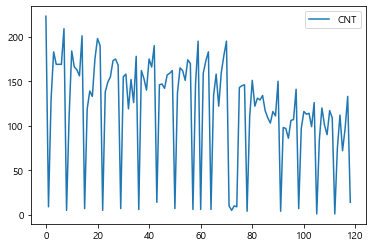

In [75]:
all.plot()

### 명절이라는 이상치를 제거 하고 시작.

In [76]:
all=all.drop([118,72,73,74,60])

In [77]:
train=all[(all['ACCOUNTDATE']>='2018-01-02')&(all['ACCOUNTDATE']<='2018-03-30')]
test=all[(all['ACCOUNTDATE']>='2018-04-02')&(all['ACCOUNTDATE']<='2018-04-30')]

In [78]:
train['ACCOUNTDATE']=train['ACCOUNTDATE'].astype('str')
train['ACCOUNTDATE']=pd.to_datetime(train['ACCOUNTDATE'])
train.index=train['ACCOUNTDATE']
train.set_index('ACCOUNTDATE',inplace=True)

In [79]:
# AD-Fuller Test : 시계열의 정상성(stationary) 한지 확인

from statsmodels.tsa.stattools import adfuller
y = train['CNT']
y_1diff = train.diff().dropna()['CNT']
result = adfuller(y)
print(f'원 데이터 ADF Statistic: {result[0]:.3f}')
print(f'원 데이터 p-value: {result[1]:.3f}')
result = adfuller(y_1diff)
print(f'1차 차분 ADF Statistic: {result[0]:.3f}')
print(f'1차 차분 p-value: {result[1]:.3f}')

원 데이터 ADF Statistic: -0.821
원 데이터 p-value: 0.813
1차 차분 ADF Statistic: -4.716
1차 차분 p-value: 0.000


In [80]:
import itertools
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [81]:
import warnings
warnings.filterwarnings('ignore')

for param in pdq:
    try:
        model_arima=ARIMA(train.CNT.values, order=param)
        model_arima_fit=model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 894.7239710636949
(0, 0, 1) 896.7040514148812
(0, 0, 2) 898.6348465061253
(0, 0, 3) 900.1703640862986
(0, 0, 4) 898.434545349229
(0, 1, 0) 942.709692995849
(0, 1, 1) 880.4344738082414
(0, 1, 2) 879.1019982855307
(0, 1, 3) 876.6626087684314
(0, 1, 4) 873.8522348593316
(0, 2, 0) 1020.3919842133591
(0, 2, 1) 938.6421032960072
(0, 2, 2) 881.5434313043806
(0, 2, 3) 880.9120566983261
(0, 2, 4) 876.0643145736292
(1, 0, 0) 896.7053901163611
(1, 0, 1) 898.7239711022814
(1, 0, 2) 895.4685338614571
(1, 0, 3) 902.6323453999762
(1, 0, 4) 886.8131662866139
(1, 1, 0) 922.5664826240402
(1, 1, 1) 880.5591306258877
(1, 2, 0) 980.045062420777
(1, 2, 3) 881.643486737192
(1, 2, 4) 877.1124999168471
(2, 0, 0) 898.6042363731812
(2, 0, 1) 900.54508954937
(2, 0, 3) 1251.6032458598859
(2, 0, 4) 888.107418349746
(2, 1, 0) 910.1130374935276
(2, 1, 1) 878.972371081442
(2, 1, 2) 878.3330975183229
(2, 2, 0) 957.752156383943
(2, 2, 1) 907.9458114189947
(2, 2, 4) 881.3235938632149
(3, 0, 0) 900.0985679852183

In [82]:
pip install statsmodels 

Note: you may need to restart the kernel to use updated packages.


In [83]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

                             ARIMA Model Results                              
Dep. Variable:                  D.CNT   No. Observations:                   82
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -432.867
Method:                       css-mle   S.D. of innovations             45.974
Date:                Wed, 03 Nov 2021   AIC                            879.733
Time:                        10:22:59   BIC                            896.581
Sample:                             1   HQIC                           886.497
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ar.L1.D.CNT    -1.1421      0.114    -10.052      0.000      -1.365      -0.919
ar.L2.D.CNT    -0.5010      0.175     -2.861      0.004      -0.844      -0.158
ar.L3.D.CNT    -0.3877      0.171     -2.261    

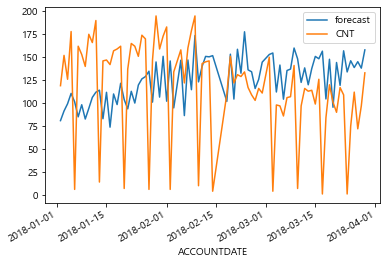

In [84]:
model = ARIMA(train, (4,1,2))
model_fit = model.fit(trend='nc',full_output=True,disp=1)
print(model_fit.summary())
model_fit.plot_predict()
plt.show()

In [85]:
forecast_data=model_fit.forecast(steps=29) 

pred_y=forecast_data[0].tolist()
test_y=test.CNT.values 

In [86]:
pred_y 

[88.02721220752989,
 75.68787557337106,
 92.48617766144199,
 88.46521939654548,
 99.98515975672832,
 85.2272708987512,
 93.92548074824249,
 87.86297122489104,
 93.44571767646859,
 90.19996858451253,
 91.41794984203507,
 90.91217481234308,
 90.8270875486353,
 91.46759343652522,
 90.68877913398552,
 91.40912520290664,
 90.74825938891652,
 91.29369004140486,
 90.9054437841611,
 91.16266941113817,
 91.00712048711851,
 91.07835134803183,
 91.06636816746494,
 91.04427322089232,
 91.08442055886677,
 91.03755748281483,
 91.08234625405785,
 91.04429432371418,
 91.07405600724752]

In [87]:
test_y

array([223,   9, 130, 183, 169, 169, 169, 209,   5, 111, 184, 166, 163,
       156, 201,   7, 119, 139, 133, 175, 198, 190,   5, 138, 149, 155,
       173, 175, 168], dtype=int64)

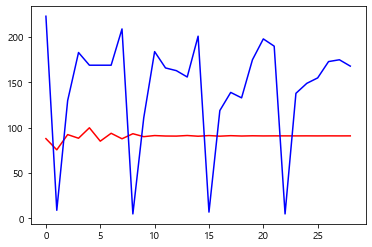

In [88]:
plt.plot(pred_y,color='red') #에측값
plt.plot(test_y,color='blue') #실제값

In [89]:
residuals=pred_y-test_y

In [90]:
print(residuals)

[-134.97278779   66.68787557  -37.51382234  -94.5347806   -69.01484024
  -83.7727291   -75.07451925 -121.13702878   88.44571768  -20.80003142
  -92.58205016  -75.08782519  -72.17291245  -64.53240656 -110.31122087
   84.4091252   -28.25174061  -47.70630996  -42.09455622  -83.83733059
 -106.99287951  -98.92164865   86.06636817  -46.95572678  -57.91557944
  -63.96244252  -81.91765375  -83.95570568  -76.92594399]


In [91]:
from sklearn.metrics import r2_score
print(r2_score(test_y,pred_y))

#마이너스가 나오는 경우 모델의 예측값이 평균값으로 예측하는것보다 정확하지 않을때 발생함

-0.7563411860641673


# --------------------------------------------------------------------------------------------------------

## Frophet 사용

In [56]:
from fbprophet import Prophet

In [57]:
train.columns=['ds','y']
test.columns=['ds','y']

In [58]:
train['ds']= pd.to_datetime(train['ds'])

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 31 to 117
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      83 non-null     datetime64[ns]
 1   y       83 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.9 KB


In [60]:
prophet = Prophet(seasonality_mode = 'multiplicative',
                 daily_seasonality=True,
                 changepoint_prior_scale=0.5)
prophet.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [61]:
future_data = prophet.make_future_dataframe(periods = 21, freq = 'd')
forecast_data = prophet.predict(future_data)
a=forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(21)

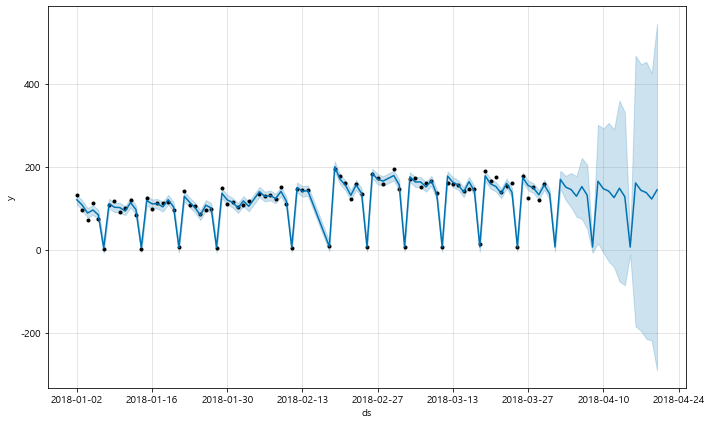

In [62]:
fig1=prophet.plot(forecast_data)

### train=2018년1월2일 ~ 2018년3월30일
### test=2018년4월2일 ~ 2018년4월30일

In [63]:
pred_y=a.yhat.values[0:21]
test_y=test.y.values[0:21]

In [64]:
pred_y #2018년4월2일 ~ 2018년4월30일0의 에측값

array([134.85628591,   6.94762105, 169.7390718 , 151.14532206,
       145.19496441, 129.15209896, 152.33431182, 131.44126246,
         6.77104468, 165.4093701 , 147.27580895, 141.46414322,
       125.82127663, 148.39109417, 128.02623902,   6.59446831,
       161.0796684 , 143.40629584, 137.73332203, 122.49045429,
       144.44787652])

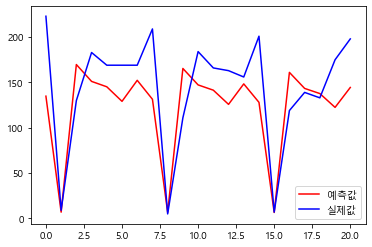

In [65]:
plt.plot(pred_y,color='red',label='예측값') #에측값
plt.plot(test_y,color='blue',label='실제값') #실제값
plt.legend()

- MAE 첫번째는 예측한 모델의 값과 실제 값의 차이의 절대값의 합

In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
 
mean_absolute_error(pred_y,test_y) 

33.93121643270948

- MSE 첫번째 방법처럼 모델의 값과 실제값의 차이를 제곱 후의 합

In [67]:
mean_squared_error(pred_y,test_y)

1806.3027231655644

- MSE에 루트를 취한 값

In [68]:
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
rmse=sqrt(mean_squared_error(pred_y,test_y))
print(rmse)

42.50062026800979


In [69]:
from sklearn.metrics import r2_score
print(r2_score(test_y,pred_y))

0.5371070591444258
